#### Step: Sample Data Exploration

Time: 15 min

Goal/Scenario:

Let’s do EDA for a regression, checking all assumptions as we go. Then, students make an OLS model and check remaining assumptions.

Learning Goals in sequence:

Look at relationships between predictors, response variable, and other predictors using VIF, scatterplot matrices, ands marginal plots. Once model is done, check remaining assumptions. Determine if a transformation is needed and, if so, for which variables. Determine whether endogenous variables exist.


In [7]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm

from itertools import combinations
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
df = pd.read_csv("Bordeaux.csv")
df.head()

,Wine,Price,ParkerPoints,CoatesPoints,P95andAbove,FirstGrowth,CultWine,Pomerol,VintageSuperstar
0,Lafite,2850,100,19.5,1,1,0,0,0
1,Latour,2850,98,18.5,1,1,0,0,0
2,Margaux,2900,100,19.5,1,1,0,0,0
3,Mouton,2500,97,17.0,1,1,0,0,0
4,Haut Brion,2500,98,18.5,1,1,0,0,0


In [160]:
bcc, lbcc = stats.boxcox(df.CoatesPoints)
print(lbcc)

df["CoatesPointsBC"] = bcc

3.030974438737625


In [162]:
df.head()

,Wine,Price,ParkerPoints,CoatesPoints,P95andAbove,FirstGrowth,CultWine,Pomerol,VintageSuperstar,BCParkerPoints,CoatesPointsBC
0,Lafite,2850,100,19.5,1,1,0,0,0,0.082076,2681.799051
1,Latour,2850,98,18.5,1,1,0,0,0,0.082076,2286.231350
2,Margaux,2900,100,19.5,1,1,0,0,0,0.082076,2681.799051
3,Mouton,2500,97,17.0,1,1,0,0,0,0.082076,1769.277593
4,Haut Brion,2500,98,18.5,1,1,0,0,0,0.082076,2286.231350


In [161]:
linreg = sm.OLS(df.Price, df.drop(columns=["Price", "Wine", "P95andAbove", "CoatesPoints"])).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     36.63
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           4.94e-19
Time:                        15:21:58   Log-Likelihood:                -591.47
No. Observations:                  72   AIC:                             1197.
Df Residuals:                      65   BIC:                             1213.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ParkerPoints        61.2011     45.031      1.359      0.179     -28.733     151.135
FirstGrowth       1982.3220    411.899      4.813      0.000    1159.704    2804.940
CultWine          4589.1508    471.018      9.743      0.000    3648.463    5529.838
Pomerol            738.7519    305.651      2.417      0.018     128.324    1349.180
VintageSuperstar  1430.5708    715.800      1.999      0.050       1.019    2860.123
BCParkerPoints   -7.339e+04   4.77e+04     -1.540      0.128   -1.69e+05    2.18e+04
CoatesPointsBC       0.3790      0.383      0.990      0.326      -0.385       1.143
==============================================================================
Omnibus:                       36.920   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.764
Skew:                           0.926   Prob(JB):                     1.17e-91
Kurtosis:                      14.669   Cond. No.                     8.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

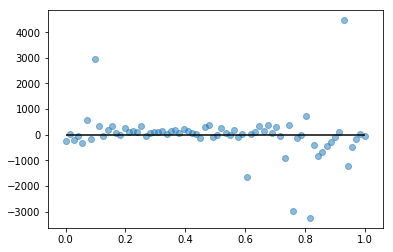

In [165]:
residuals = linreg.resid
xs = np.linspace(0, 1, len(residuals))
plt.scatter(xs, residuals, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=1)
plt.show()

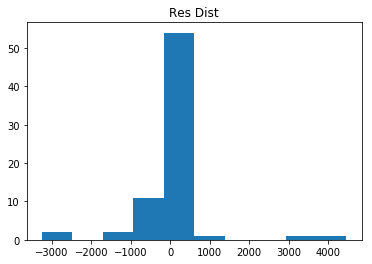

In [166]:
plt.hist(linreg.resid)
plt.title("Res Dist")
plt.show()

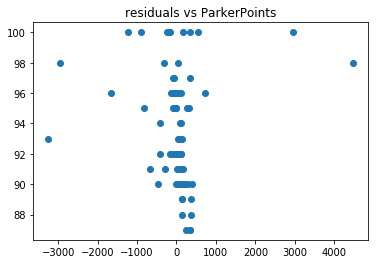

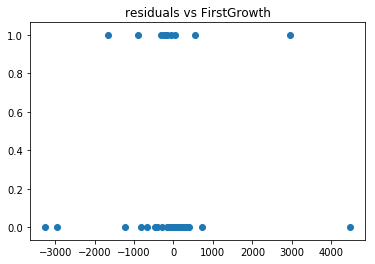

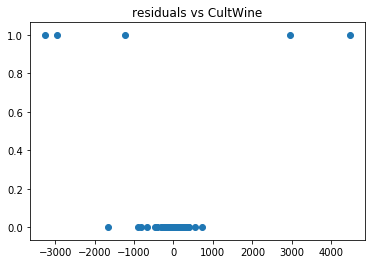

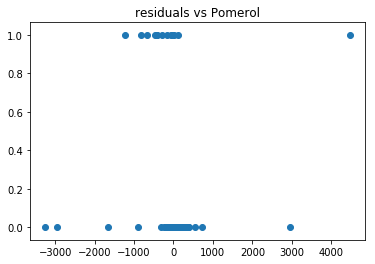

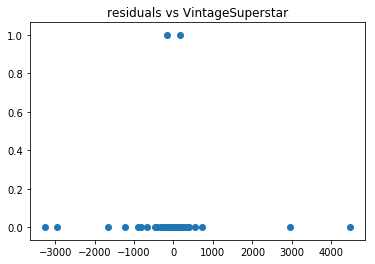

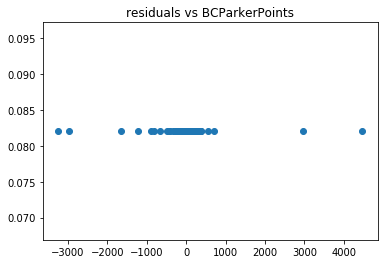

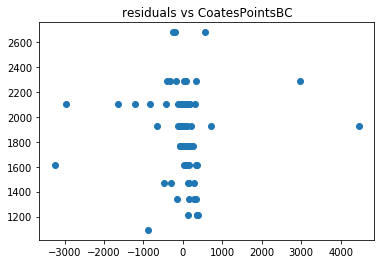

In [167]:
for col in df.drop(columns=["Price", "Wine", "P95andAbove", "CoatesPoints"]).columns:
    plt.scatter(linreg.resid, df[col])
    plt.title("residuals vs {}".format(col))
    plt.show()

### EDA 

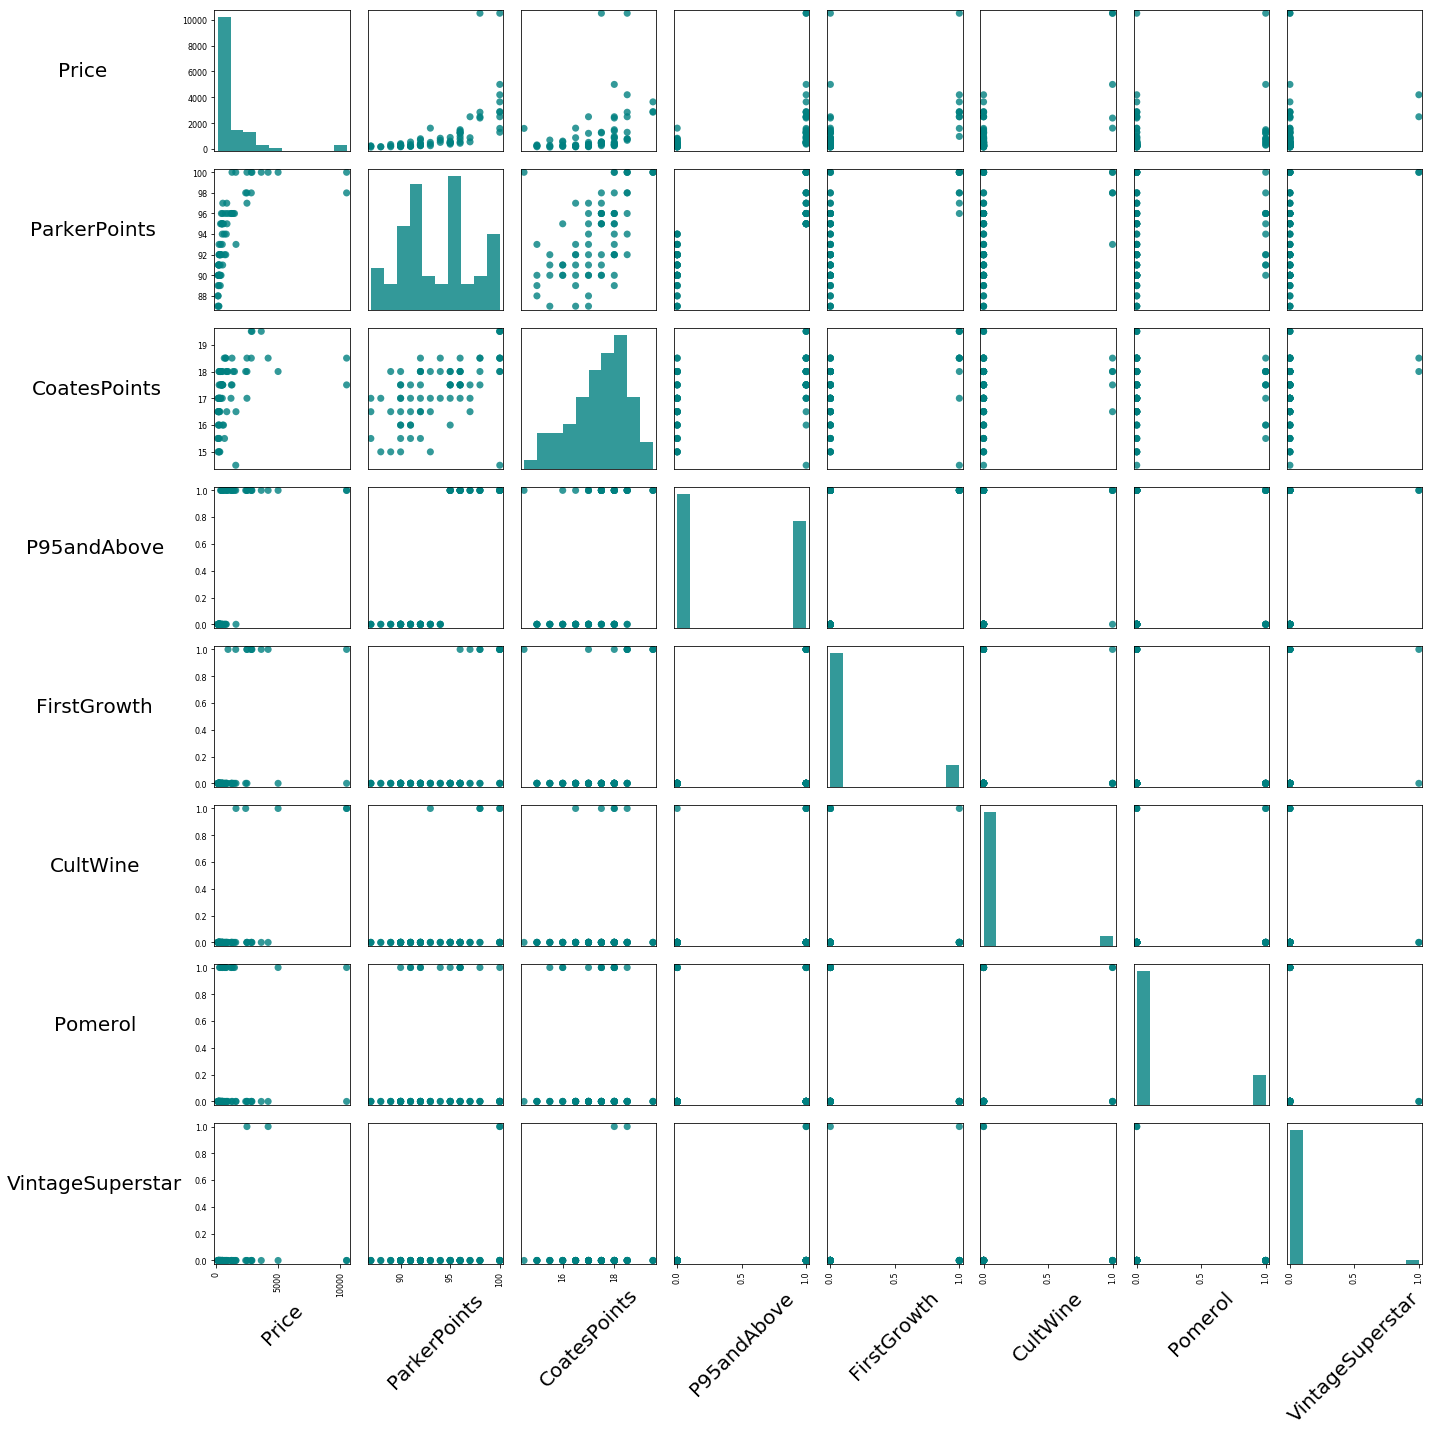

In [9]:
# Scatter Matrix
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(20, 20), 
                                            c='teal', hist_kwds={"color": "teal", "alpha":0.8}, 
                                            grid=True, alpha=0.8, s=200)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0, labelpad=100)
plt.tight_layout()

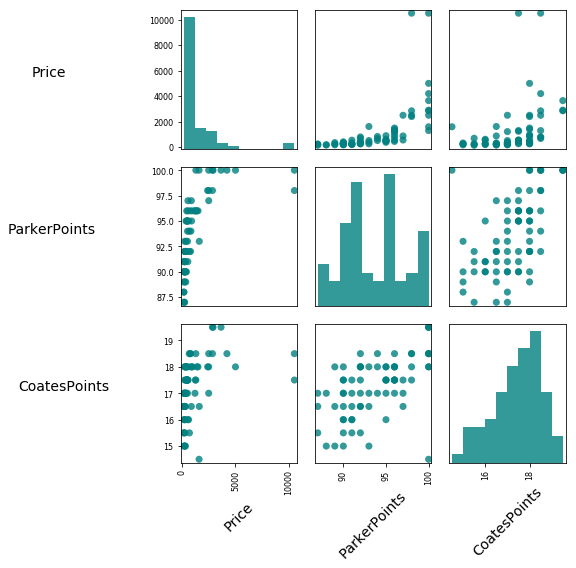

In [12]:
### Let's look at a ScatterMatrix of just the continuous columns with Price
continuous_cols = ["Price", "ParkerPoints", "CoatesPoints"]
scatter_matrix = pd.plotting.scatter_matrix(df[continuous_cols], figsize=(8, 8), 
                                            c='teal', hist_kwds={"color": "teal", "alpha":0.8}, 
                                            grid=True, alpha=0.8, s=200)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 14, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 14, rotation = 0, labelpad=100)
plt.tight_layout()

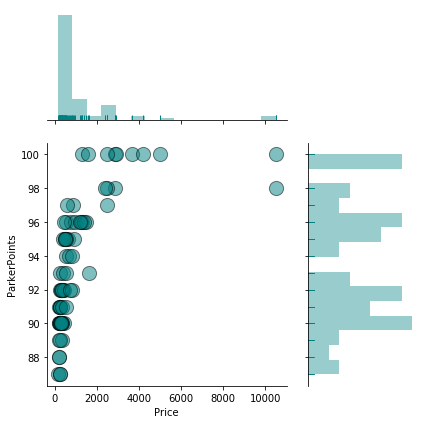

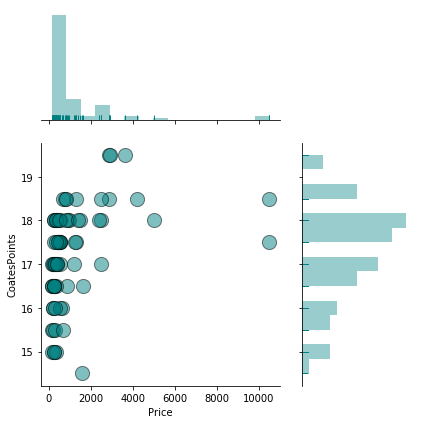

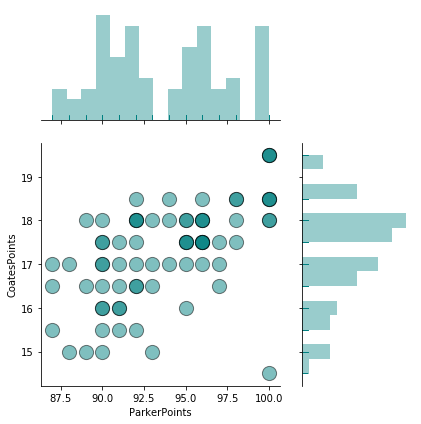

In [13]:
combos = combinations(continuous_cols, 2)
for combo in combos:
    sns.jointplot(x=combo[0], y=combo[1], data=df, kind='scatter', color='teal', s=200, alpha=0.5,
                  edgecolor="black", marginal_kws={"bins":15, "rug":True, "color": "teal"}, ratio=2)
plt.show()

### VIF


In [14]:
df.head()

,Wine,Price,ParkerPoints,CoatesPoints,P95andAbove,FirstGrowth,CultWine,Pomerol,VintageSuperstar
0,Lafite,2850,100,19.5,1,1,0,0,0
1,Latour,2850,98,18.5,1,1,0,0,0
2,Margaux,2900,100,19.5,1,1,0,0,0
3,Mouton,2500,97,17.0,1,1,0,0,0
4,Haut Brion,2500,98,18.5,1,1,0,0,0


In [15]:
features = "+".join(df.drop(axis=1, columns=["Wine", "Price"]).columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('Price ~' + features, df, return_type='dataframe')

In [16]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [17]:
vif

,VIF Factor,features
0,3290.597439,Intercept
1,6.070170,ParkerPoints
2,1.443836,CoatesPoints
3,4.078230,P95andAbove
4,1.655775,FirstGrowth
5,1.200133,CultWine
6,1.123699,Pomerol
7,1.148701,VintageSuperstar


### BoxCox
BoxCox: A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

The Box Cox transformation is named after statisticians George Box and Sir David Roxbee Cox who collaborated on a 1964 paper and developed the technique. [[source]](https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/)


#### Step: Box-Cox demonstration, followed by students transforming in small groups

Time: 20 min
-Demo: Transform one or more predictor to normality, give students some variables to transform

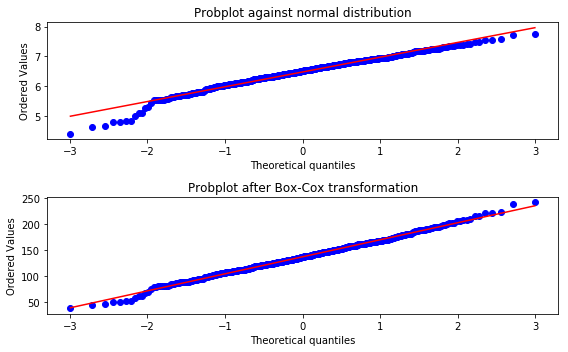

In [59]:
fig = plt.figure(figsize=(8, 5))

ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5 # sample
prob = stats.probplot(x, , plot=ax1)
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x) # Transforming data with boxcox
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.tight_layout()
plt.show()

In [18]:
boxcox = pd.read_csv("boxcoxpractice.csv", usecols=['x1', 'x2', 'x3'])
boxcox.head()

,x1,x2,x3
0,5.038660,0.370705,17.053873
1,4.316324,0.073641,11.874907
2,3.640515,0.588711,15.039899
3,4.111693,0.740497,11.570607
4,3.853151,0.176119,14.870509


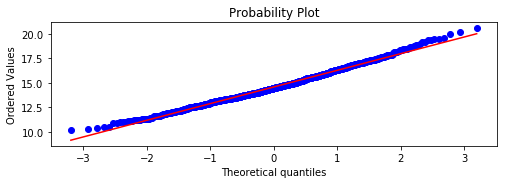

In [33]:
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(211)
stats.probplot(boxcox["x3"], dist=stats.norm, plot=ax1)
plt.show()

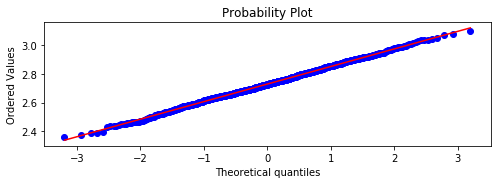

In [34]:
fig = plt.figure(figsize=(8, 5))
x3t, _ = stats.boxcox(boxcox["x3"])
ax1 = fig.add_subplot(211)
stats.probplot(x3t, dist=stats.norm, plot=ax1)
plt.show()

(0.9925795197486877, 6.622185901505873e-05)


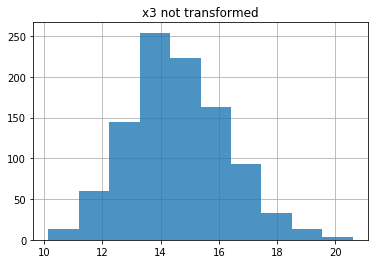

In [96]:
print(stats.shapiro(boxcox["x3"]))
plt.hist(boxcox["x3"], alpha=0.8, zorder=2)
plt.grid(zorder=0)
plt.title("x3 not transformed")
plt.show()

(0.9988289475440979, 0.773489773273468)


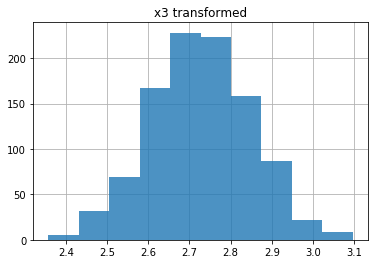

In [97]:
print(stats.shapiro(boxcox["x3t"]))
plt.hist(boxcox["x3t"], alpha=0.8, zorder=2)
plt.grid(zorder=0)
plt.title("x3 transformed")
plt.show()

In [36]:
boxcox["x3t"] = x3t
boxcox.head()

,x1,x2,x3,x3t
0,5.038660,0.370705,17.053873,2.898621
1,4.316324,0.073641,11.874907,2.521712
2,3.640515,0.588711,15.039899,2.767521
3,4.111693,0.740497,11.570607,2.494759
4,3.853151,0.176119,14.870509,2.755717


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0820755731695399, right=0.0820755731695399
  ax.set_xlim(boundaries_list[j])
/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0820755731695399, right=0.0820755731695399
  ax.set_xlim(boundaries_list[j])
/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0820755731695399, right=0.0820755731695399
  ax.set_xlim(boundaries_list[j])
/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.082

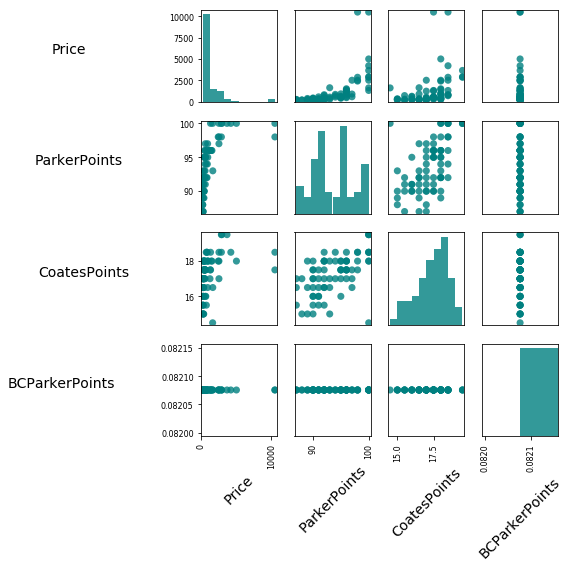

In [151]:
### Let's look at a ScatterMatrix of just the continuous columns with Price
continuous_cols = ["Price", "ParkerPoints", "CoatesPoints"]
scatter_matrix = pd.plotting.scatter_matrix(df[continuous_cols], figsize=(8, 8), 
                                            c='teal', hist_kwds={"color": "teal", "alpha":0.8}, 
                                            grid=True, alpha=0.8, s=200)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 14, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 14, rotation = 0, labelpad=100)
plt.tight_layout()

### Transforming Parker Points

In [152]:
ppt= stats.boxcox(df.ParkerPoints, lmbda=-12.183892982804323)
ppt

array([0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557, 0.08207557, 0.08207557, 0.08207557,
       0.08207557, 0.08207557])

In [154]:
def boxcox_func(x, lm):
    return np.log((np.power(x, lm) - 1) / lm)

In [157]:
pp = boxcox_func(df.ParkerPoints, -12.183892982804323)

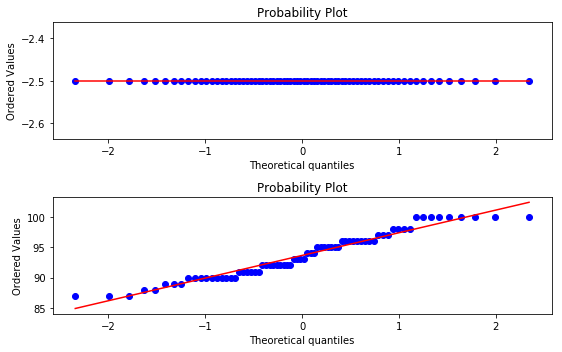

In [158]:
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(211)
stats.probplot(pp, dist=stats.norm, plot=ax1)

ax2 = fig.add_subplot(212)
stats.probplot(df["ParkerPoints"], dist=stats.norm, plot=ax2)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Probplot against normal distribution')

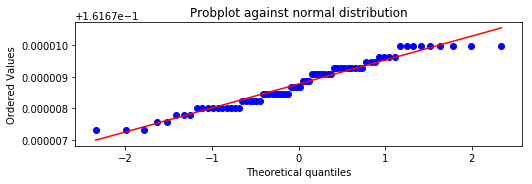

In [135]:
fig = plt.figure(figsize=(8, 5))

ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5 # sample
prob = stats.probplot(ppt, dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')

In [85]:
stats.kurtosis(df.ParkerPoints), stats.kurtosis(df.BCParkerPoints)

(-0.9656467243103459, -0.9618940360276174)

In [87]:
linreg = sm.OLS(df.Price, df.ParkerPoints).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     31.41
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           3.72e-07
Time:                        14:50:02   Log-Likelihood:                -643.54
No. Observations:                  72   AIC:                             1289.
Df Residuals:                      71   BIC:                             1291.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
ParkerPoints    13.0761      2.333      5.605      0.000       8.424      17.728
==============================================================================
Omnibus:                       85.500   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              845.935
Skew:                           3.706   Prob(JB):                    2.03e-184
Kurtosis:                      18.068   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
linreg = sm.OLS(df.Price, df.BCParkerPoints).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     28.30
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.15e-06
Time:                        14:50:29   Log-Likelihood:                -644.65
No. Observations:                  72   AIC:                             1291.
Df Residuals:                      71   BIC:                             1294.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
BCParkerPoints  1826.8729    343.422      5.320      0.000    1142.109    2511.637
==============================================================================
Omnibus:                       83.842   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              790.147
Skew:                           3.626   Prob(JB):                    2.64e-172
Kurtosis:                      17.518   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### As demonstrated above, Box-Cox cannot normalize all variables. ParkerPoints has too many outliers to be able to be successfully normalized. Box-Cox can get it a little closer, but it is still an unwieldy variable and should be kept in its original form when added to the model. 

#### Step: Student Discussion (25 min)

Time: 10 min 

Given four different models to choose from, break into small groups and choose the best one. Create and examine all of the models. Share the reasons for their choice to the main group.

##### Model Option 1: 
No transformed Variables. Price is predicted by First Growth, Cult Wine, Pomerol, and Vintage Superstar

In [102]:
def make_model(lst):
    linreg = sm.OLS(df.Price, df[lst]).fit()
    linreg.summary()
    return linreg

In [116]:
def plot_residuals(linreg):
    plt.figure(figsize=(8, 5))
    plt.grid(zorder=0)
    plt.hist(linreg.resid, alpha=0.8, zorder=2)
    plt.title("Residuals")
    plt.show()

In [117]:
def workflow(lst):
    linreg = make_model(lst)
    plot_residuals(linreg)

In [118]:
lst = ["FirstGrowth", "CultWine", "Pomerol", "VintageSuperstar"]
linreg = make_model(lst)

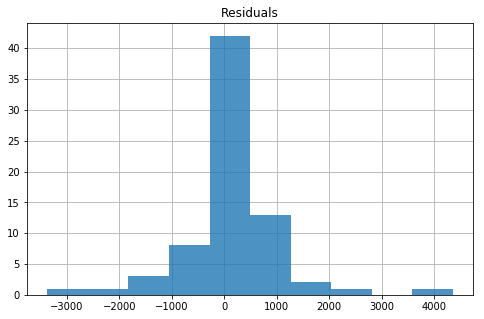

In [119]:
workflow(lst)

##### Model Option 2: 
Log transformed Price is predicted by all variables except for P95 and Vintage Superstar

##### Model Option 3: 
LogPrice predicted by Box-Cox transformed Coates Points and all other variables except for P95

##### Model Option 4: 
Log Price is predicted by transformed Coates, transformed Parker, all others except for P95 and Vintage Superstar

### Assessment